In [2]:
import quandl
import pandas as pd


In [262]:
import math
import numpy as np
from sklearn import preprocessing, cross_validation
from sklearn.linear_model import LinearRegression
import pickle
import matplotlib.pyplot as plt
from matplotlib import style

In [263]:
df = quandl.get('WIKI/YHOO')

In [264]:
pd.set_option('display.max_colwidth', -1)
df.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2016-10-13,42.00,42.080,41.170,41.62,15388334.0,0.0,1.0,42.00,42.080,41.170,41.62,15388334.0
2016-10-14,42.04,42.250,41.405,41.44,7690386.0,0.0,1.0,42.04,42.250,41.405,41.44,7690386.0
2016-10-17,41.35,41.940,41.240,41.79,8575923.0,0.0,1.0,41.35,41.940,41.240,41.79,8575923.0
2016-10-18,42.04,42.605,41.630,41.68,12997849.0,0.0,1.0,42.04,42.605,41.630,41.68,12997849.0
2016-10-19,42.30,42.940,42.260,42.73,12750349.0,0.0,1.0,42.30,42.940,42.260,42.73,12750349.0


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5151 entries, 1996-04-12 to 2016-10-19
Data columns (total 12 columns):
Open           5151 non-null float64
High           5151 non-null float64
Low            5151 non-null float64
Close          5151 non-null float64
Volume         5151 non-null float64
Ex-Dividend    5151 non-null float64
Split Ratio    5151 non-null float64
Adj. Open      5151 non-null float64
Adj. High      5151 non-null float64
Adj. Low       5151 non-null float64
Adj. Close     5151 non-null float64
Adj. Volume    5151 non-null float64
dtypes: float64(12)
memory usage: 523.1 KB


In [266]:
df_new = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

In [267]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5151 entries, 1996-04-12 to 2016-10-19
Data columns (total 5 columns):
Adj. Open      5151 non-null float64
Adj. High      5151 non-null float64
Adj. Low       5151 non-null float64
Adj. Close     5151 non-null float64
Adj. Volume    5151 non-null float64
dtypes: float64(5)
memory usage: 241.5 KB


In [268]:
pd.options.mode.chained_assignment = None  # default='warn'

df_new['HL_PCT'] = (df_new['Adj. Close'] - df_new['Adj. Open']) / df_new['Adj. Close'] * 100
df_new['PCT_Change'] = df_new['Adj. Close'] - df_new['Adj. Open'] / df_new['Adj. Open'] * 100

In [269]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5151 entries, 1996-04-12 to 2016-10-19
Data columns (total 7 columns):
Adj. Open      5151 non-null float64
Adj. High      5151 non-null float64
Adj. Low       5151 non-null float64
Adj. Close     5151 non-null float64
Adj. Volume    5151 non-null float64
HL_PCT         5151 non-null float64
PCT_Change     5151 non-null float64
dtypes: float64(7)
memory usage: 321.9 KB


In [270]:
df_final = df_new[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume']]

In [271]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5151 entries, 1996-04-12 to 2016-10-19
Data columns (total 4 columns):
Adj. Close     5151 non-null float64
HL_PCT         5151 non-null float64
PCT_Change     5151 non-null float64
Adj. Volume    5151 non-null float64
dtypes: float64(4)
memory usage: 201.2 KB


In [272]:
df_final.tail()

,Adj. Close,HL_PCT,PCT_Change,Adj. Volume
Date,,,,
2016-10-13,41.62,-0.913023,-58.38,15388334.0
2016-10-14,41.44,-1.447876,-58.56,7690386.0
2016-10-17,41.79,1.052883,-58.21,8575923.0
2016-10-18,41.68,-0.863724,-58.32,12997849.0
2016-10-19,42.73,1.006319,-57.27,12750349.0


In [273]:
forecast_close = 'Adj. Close'
df_final.fillna(-99999, inplace=True)

In [274]:
forecast_out = int(math.ceil(0.001*len(df_final)))

In [275]:
df.size, forecast_out, float(forecast_out/float(df.size))

(61812, 6, 9.706853038245001e-05)

In [276]:
df_final['label'] = df_final[forecast_close].shift(-forecast_out)

In [277]:
df_final.tail(520)

,Adj. Close,HL_PCT,PCT_Change,Adj. Volume,label
Date,,,,,
2014-09-08,41.810,3.420234,-58.190,73809489.0,42.710
2014-09-09,40.780,-2.991663,-59.220,52540854.0,42.590
2014-09-10,41.140,0.315994,-58.860,30634934.0,42.085
2014-09-11,41.260,0.412021,-58.740,25019578.0,40.930
2014-09-12,42.880,2.541978,-57.120,69291074.0,38.650
2014-09-15,42.550,-3.407756,-57.450,71625570.0,39.050
2014-09-16,42.710,0.046827,-57.290,61318081.0,39.880
2014-09-17,42.590,0.469594,-57.410,39406866.0,38.950
2014-09-18,42.085,-2.292978,-57.915,89789555.0,40.660


In [278]:
df_final.dropna(inplace=True)

In [279]:
X = np.array(df_final.drop(['label'],1))

In [280]:
X.size, len(X), df_final.size

(20580, 5145, 25725)

In [281]:
X = preprocessing.scale(X)

In [282]:
X_features = X[:-forecast_out+1]

In [283]:
X_features

array([[ -1.37619621e+00,   7.47685838e+00,  -1.37619621e+00,
          1.82144841e+01],
       [ -1.37810244e+00,  -3.42387563e+00,  -1.37810244e+00,
          2.61570178e+00],
       [ -1.38699814e+00,  -3.84330111e+00,  -1.38699814e+00,
          1.13852199e+00],
       ..., 
       [  1.16899184e+00,   2.86567250e-01,   1.16899184e+00,
         -6.54989507e-01],
       [  1.17082182e+00,   1.53893958e-01,   1.17082182e+00,
         -7.73449166e-01],
       [  1.17387177e+00,   6.70116888e-03,   1.17387177e+00,
         -7.09161319e-01]])

In [284]:
y = np.array(df_final['label'])

In [285]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

In [286]:
clf = LinearRegression()
clf.fit(X_train, y_train)        

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [287]:
with open('LinearRegression.pk', 'wb') as f:
    pickle.dump(clf, f)

In [288]:
pickle_in = open('LinearRegression.pk', 'rb')
clf = pickle.load(pickle_in)

In [289]:
accuracy = clf.score(X_test, y_test)

print accuracy

0.971456373496


In [290]:
clf.intercept_, clf.coef_


(23.959259295937873,
 array([ 8.07253714, -0.10649568,  8.07253714,  0.04068254]))

In [291]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5145 entries, 1996-04-12 to 2016-10-11
Data columns (total 5 columns):
Adj. Close     5145 non-null float64
HL_PCT         5145 non-null float64
PCT_Change     5145 non-null float64
Adj. Volume    5145 non-null float64
label          5145 non-null float64
dtypes: float64(5)
memory usage: 241.2 KB


In [292]:
X_future =  X[-forecast_out:]

In [293]:
forecast_set = clf.predict(X_future)

In [294]:
print(forecast_set, accuracy, forecast_out)

(array([ 42.8819421 ,  43.35967408,  43.36441849,  42.92190201,
        43.56109011,  42.48283199]), 0.97145637349637537, 6)


In [295]:
df_final['Forecast'] = np.nan

In [296]:
import datetime

In [297]:
last_date = df.iloc[-1].name
next_date = last_date + pd.DateOffset(days = 1)


In [298]:
for i in forecast_set:
    next_date = last_date + pd.DateOffset(days = 1)
    df_final.loc[next_date] = [np.nan for _ in range(len(df_final.columns)-1)] + [i]
    last_date = next_date

In [299]:
forecast_set

array([ 42.8819421 ,  43.35967408,  43.36441849,  42.92190201,
        43.56109011,  42.48283199])

In [301]:
import seaborn as sns
import mpld3
mpld3.enable_notebook()

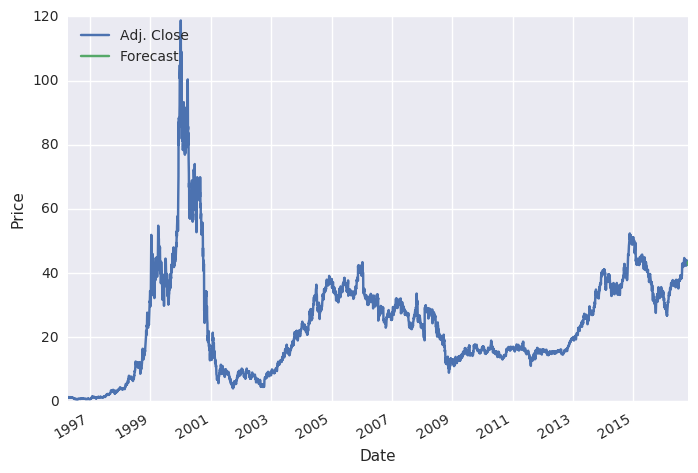

In [302]:
df_final['Adj. Close'].plot()
df_final['Forecast'].plot()
plt.legend(loc=2)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()